# **Example 1 Using inbuilt Model**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)

#Reading Data
data = pd.read_csv('Admission_Predict.csv')
print(data.shape)
data.head()

FileNotFoundError: ignored

In [ ]:
data.drop(["Serial No."],axis=1,inplace=True)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


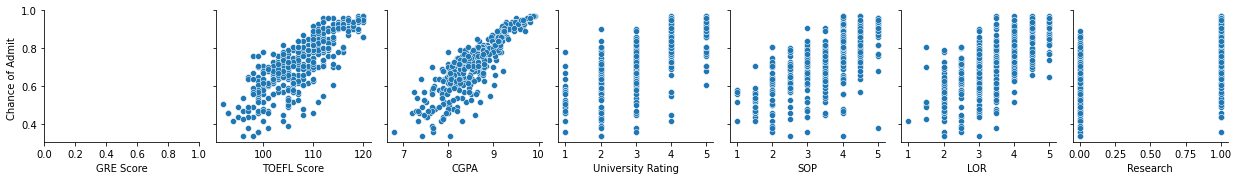

In [ ]:
#Checking graph of each score w.r.t chance of Admit 
import seaborn as sns
sns.pairplot(data, x_vars=['GRE Score','TOEFL Score','CGPA','University Rating','SOP','LOR ','Research'], y_vars='Chance of Admit ');

In [ ]:
#Creating a Linear Regression Model
x = data[['CGPA','GRE Score','TOEFL Score']]
y = data[['Chance of Admit ']]

In [ ]:
from sklearn.model_selection import train_test_split

# Split data for test and train the model.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=.20)

In [ ]:
# x shape
x.shape


(400, 3)

In [ ]:
# x_train shape 80% of data from x - 20% other data for test
x_train.shape

(320, 3)

In [ ]:
# x_train first five rows:
x_train.head()

,CGPA,GRE Score,TOEFL Score
336,8.79,319,110
64,8.70,325,111
55,7.70,320,103
106,9.18,329,111
300,8.00,309,106


In [ ]:
from sklearn.linear_model import LinearRegression
import random
from sklearn import metrics

# Train Linear Regression Model
linreg = LinearRegression()

In [ ]:
# fiting our data for training
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# our model is ready to predict y.
y_predict = linreg.predict(x_test)

In [ ]:
# our model prediction
y_predict[:10]

array([[0.69367708],
       [0.70808004],
       [0.77715683],
       [0.64062992],
       [0.73691764],
       [0.61296614],
       [0.72954121],
       [0.62755658],
       [0.90054979],
       [0.90501787]])

###  **Find Model Acuracy**

In [ ]:
# y predict
y_predict[:10]

array([[0.69367708],
       [0.70808004],
       [0.77715683],
       [0.64062992],
       [0.73691764],
       [0.61296614],
       [0.72954121],
       [0.62755658],
       [0.90054979],
       [0.90501787]])

In [ ]:
# y test
y_test[:10]

,Chance of Admit
132,0.71
309,0.70
341,0.79
196,0.73
246,0.72
60,0.48
155,0.77
261,0.71
141,0.90
214,0.94


In [ ]:
# from sklearn import metrics we can use this for find evaluating the performance
from sklearn import metrics

metrics.mean_absolute_error(y_test,y_predict)

0.050689732983069224

## **As you can see our model is train with 5% error i.e. 95% test Accuracy**

# **Example 2 - From Scratch**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read Data
data1 = pd.read_csv("Fuel.csv")
data1.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
data1.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [ ]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [ ]:
data1 = data1[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
data1.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5007ba400>,
      dtype=object)

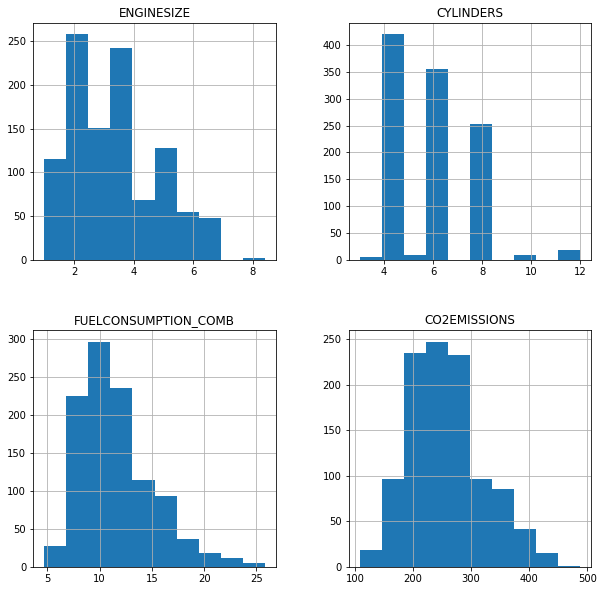

In [ ]:
# Plotting each of the features 
data1.hist(figsize=(10,10))

In [ ]:
# Taking 80% of the data for training and 20% for test.

train = data1[:(int((len(data1)*0.8)))]
test = data1[(int((len(data1)*0.8))):]

print("Training Data", train.shape)
print("Test Data", test.shape)
print("Total Data", data1.shape)

Training Data (853, 4)
Test Data (214, 4)
Total Data (1067, 4)


In [ ]:
# Finding the average co2 emission :

Emission = data1["CO2EMISSIONS"]

sum_emission = Emission.sum()
num_cars = len(Emission)
avg_prices1 = sum_emission/num_cars
avg_prices2 = Emission.mean()
print (avg_prices1)
print (avg_prices2)

256.2286785379569
256.2286785379569


In [ ]:
# Function to find Slope and Intercept :

def linear_regression(features, output):
    Xi = features
    Yi = output
    N = len(Xi)
    
    Yi_mean = Yi.mean()
    Xi_mean = Xi.mean()
    
    S_YiXi = (Yi*Xi).sum()
    Yi_Xi_ByN = (Yi.sum() * Xi.sum()) / N
    
    S_XiXi = (Xi*Xi).sum()
    XiXi_ByN = (Xi.sum() * Xi.sum()) / N
    
    slope = (S_YiXi - Yi_Xi_ByN) / (S_XiXi - XiXi_ByN)
    
    intercept = Yi_mean - slope * Xi_mean

    return (intercept, slope)

In [ ]:
# Finding slope and Interccept for actual data :

co2_intercept , co2_slope = linear_regression(train["ENGINESIZE"],train["CO2EMISSIONS"])

print ("Intercept",co2_intercept)
print ("Slope",co2_slope)

Intercept 127.16989950881992
Slope 38.79512383605651


Text(0, 0.5, 'Emission')

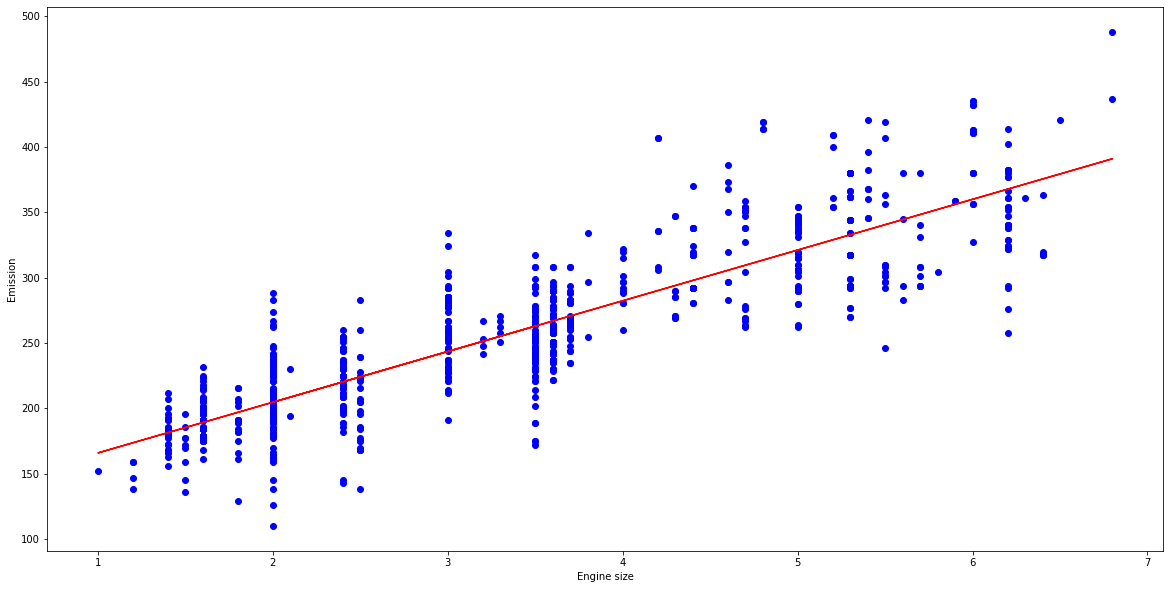

In [ ]:
# Plotting regression line with data points :

plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"],  color='blue')
plt.plot(train["ENGINESIZE"], co2_slope*train["ENGINESIZE"] + co2_intercept, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
def regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    
    return predicted_values

In [ ]:
# Predicting emission for future car :

my_engine_size = 3.5

estimatd_emission = regression_predictions(my_engine_size,co2_intercept,co2_slope)
print ("Estimated Emission :",estimatd_emission)

Estimated Emission : 262.9528329350177


In [ ]:
# Calculating the error in prediction :

def residual_sum_of_squares(input_feature,output,intercept,slope):
    prediction = input_feature*slope + intercept
    
    residual = output - prediction
    
    RSS = (residual*residual).sum()
    
    return (RSS)

In [ ]:
# Calculate the error for our test dataset:

print (residual_sum_of_squares(test["ENGINESIZE"],test["CO2EMISSIONS"],co2_intercept,co2_slope))

159741.10295932263


In [ ]:
# Calculate the error for our train dataset:

print (residual_sum_of_squares(train["ENGINESIZE"],train["CO2EMISSIONS"],co2_intercept,co2_slope))

850827.1822780487


In [ ]:
# Function to calculate the R^2 :

def R_Squared(input_feature,output,intercept,slope):
    prediction = input_feature*slope + intercept
    
    residual = output - prediction
    
    RES = (residual*residual).sum()
    
    REST = output - output.mean()
    
    TOT = (REST*REST).sum()
    
    return (1 - RES/TOT)

In [ ]:
# Caluclating the R^2 for our dataset 

print(R_Squared(test["ENGINESIZE"],test["CO2EMISSIONS"],co2_intercept,co2_slope))

0.7861345372905505


# **Linear Regression using Gradient Descent**

In [ ]:
# Gradient Descent Function

def better_Linear_Regression(features, output):
  Xi = features
  Yi = output
  m = 0
  c = 0

  L = 0.001  # The learning Rate
  epochs = 3000  # The number of iterations to perform gradient descent

  n = float(len(Yi)) # Number of elements in Xi

  # Performing Gradient Descent
  for i in range(epochs):
    Y_pred = m*Xi + c  # The current predicted value of Y
    D_m = (-1/n) * sum(Xi * (Yi - Y_pred))  # Derivative wrt m
    D_c = (-1/n) * sum(Yi - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
   
  return (c, m)

In [ ]:
# Finding slope and Interccept for actual data :

co2_intercept , co2_slope = better_Linear_Regression(train["ENGINESIZE"],train["CO2EMISSIONS"])

print ("Intercept",co2_intercept)
print ("Slope",co2_slope)

Intercept 55.05188684914352
Slope 56.968054406125624


Text(0, 0.5, 'Emission')

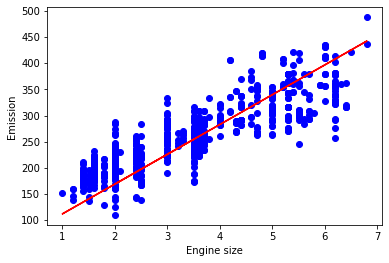

In [ ]:
# Plotting regression line with data points :

plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"],  color='blue')
plt.plot(train["ENGINESIZE"], co2_slope*train["ENGINESIZE"] + co2_intercept, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
def regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    
    return predicted_values

In [ ]:
# Predicting emission for future car :

my_engine_size = 3.5

estimatd_emission = regression_predictions(my_engine_size,co2_intercept,co2_slope)
print ("Estimated Emission :",estimatd_emission)

Estimated Emission : 267.5506335546307


In [ ]:
# Calculating the error in prediction :

def residual_sum_of_squares(input_feature,output,intercept,slope):
    prediction = input_feature*slope + intercept
    
    residual = output - prediction
    
    RSS = (residual*residual).sum()
    
    return (RSS)

In [ ]:
# Calculate the error for our test dataset:

print (residual_sum_of_squares(test["ENGINESIZE"],test["CO2EMISSIONS"],co2_intercept,co2_slope))

307559.3544647371


In [ ]:
# Calculate the error for our train dataset:

print (residual_sum_of_squares(train["ENGINESIZE"],train["CO2EMISSIONS"],co2_intercept,co2_slope))

1688660.020957066


In [ ]:
# Function to calculate the R^2 :

def R_Squared(input_feature,output,intercept,slope):
    prediction = input_feature*slope + intercept
    
    residual = output - prediction
    
    RES = (residual*residual).sum()
    
    REST = output - output.mean()
    
    TOT = (REST*REST).sum()
    
    return (1 - RES/TOT)

In [ ]:
# Caluclating the R^2 for our dataset 

print(R_Squared(test["ENGINESIZE"],test["CO2EMISSIONS"],co2_intercept,co2_slope))

0.5882316921902672


# **Test Example**

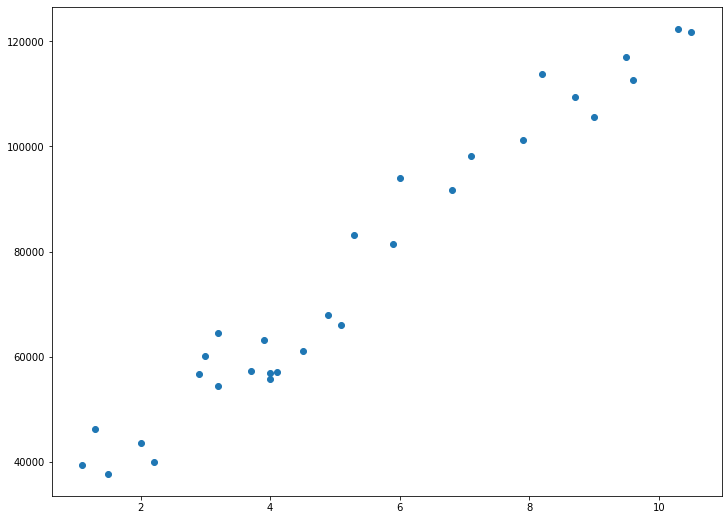

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('Salary_Data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [ ]:
# Building the model
m = 0
c = 0

L = 0.01  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent
for i in range(epochs):
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
   
print (m, c)

9501.013219578916 25448.181745946968


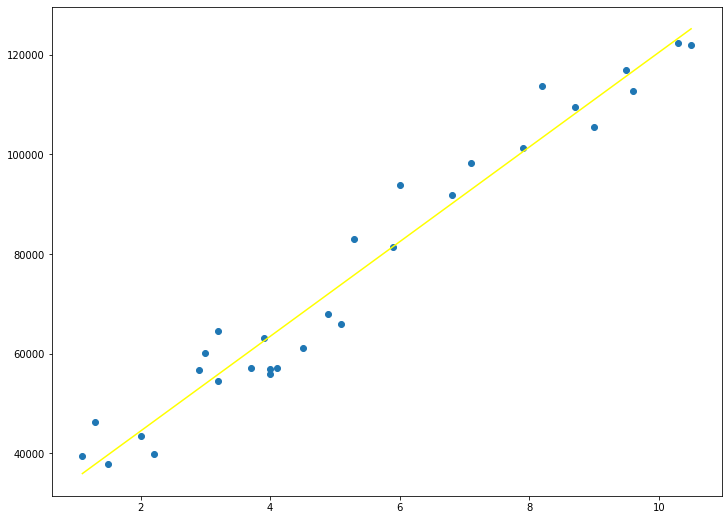

In [ ]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='yellow')  # regression line
plt.show()